In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.utils import shuffle
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('glass.csv')

print(data.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


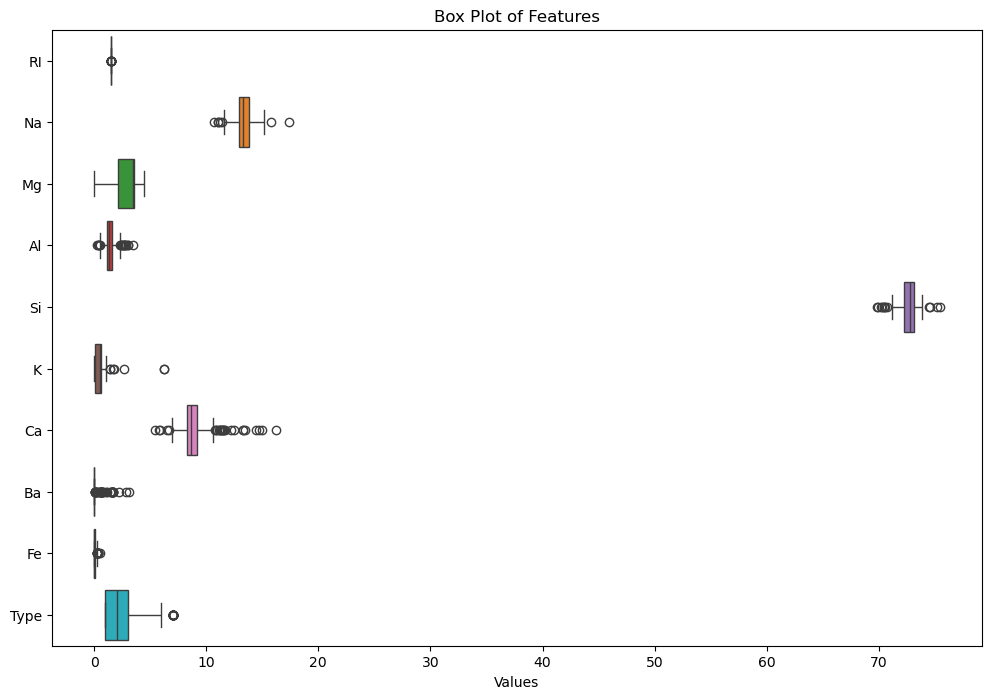

In [2]:
# Create box plots to visualize feature distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h")
plt.title('Box Plot of Features')
plt.xlabel('Values')
plt.show()

In [3]:
z_scores = zscore(data)

abs_z_scores = np.abs(z_scores)

threshold = 3

# Boolean array indicating outliers
outlier_mask = (abs_z_scores > threshold).any(axis=1)

# Remove outliers
data_cleaned = data[~outlier_mask]

# Display the shape of the original and cleaned datasets
print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", data_cleaned.shape)

data = data_cleaned

Original Data Shape: (214, 10)
Cleaned Data Shape: (194, 10)


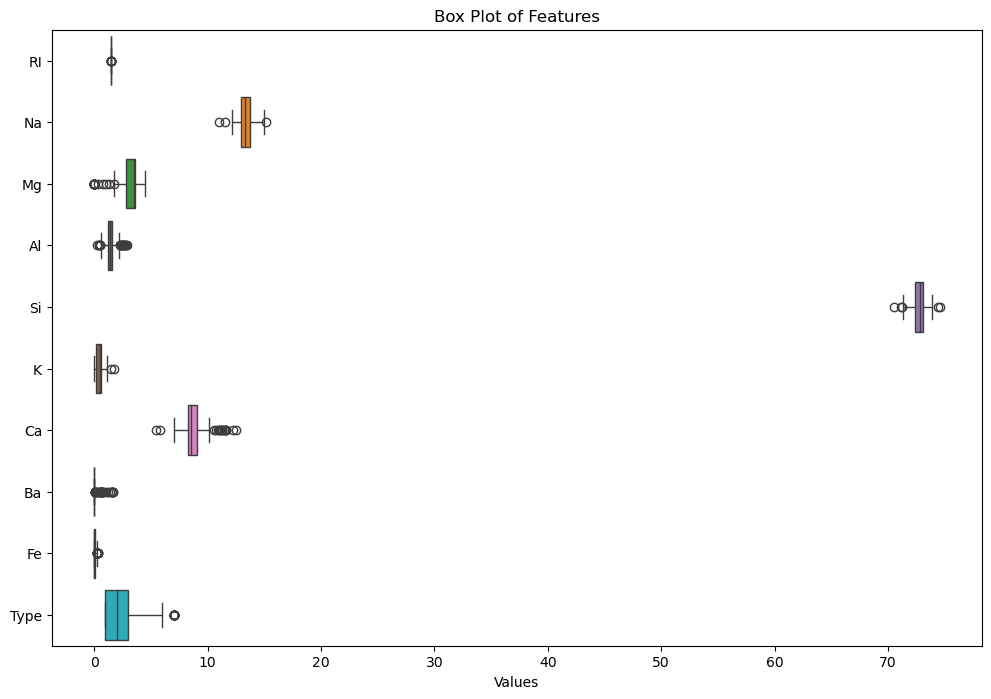

In [4]:
# Box plot after removing the outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned, orient="h")
plt.title('Box Plot of Features')
plt.xlabel('Values')
plt.show()

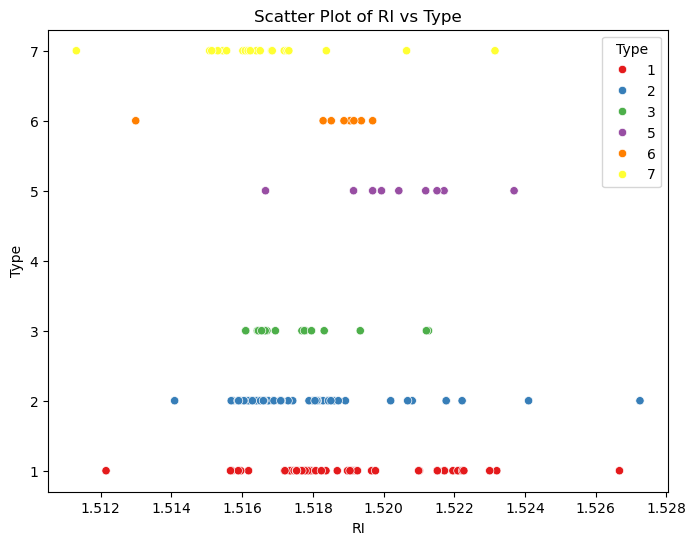

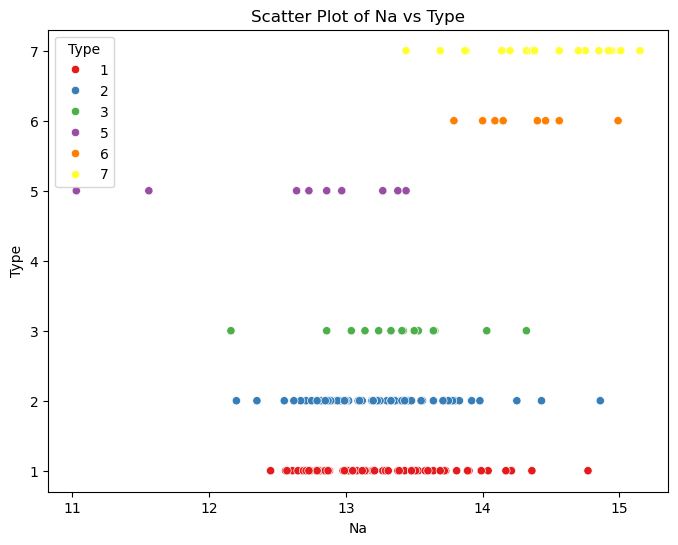

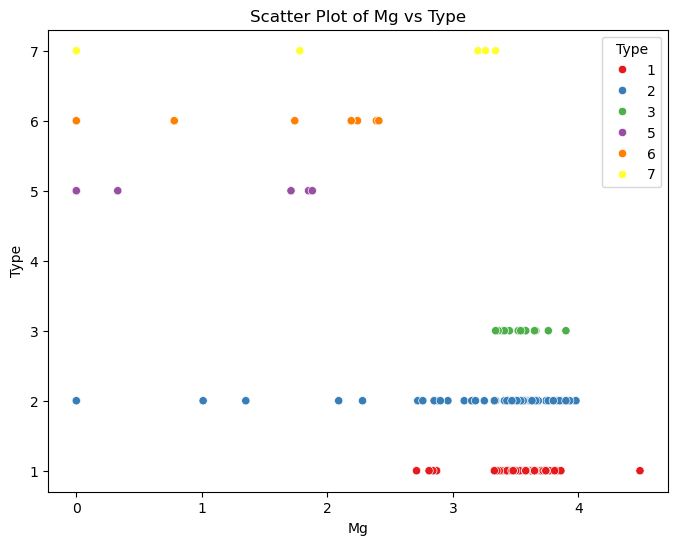

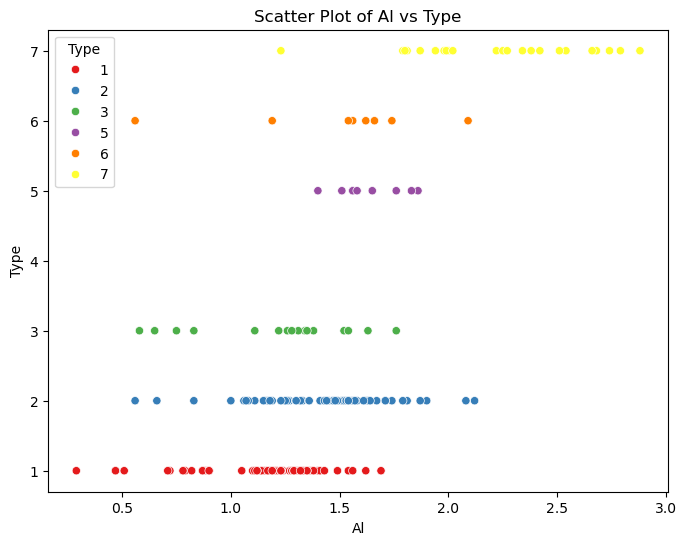

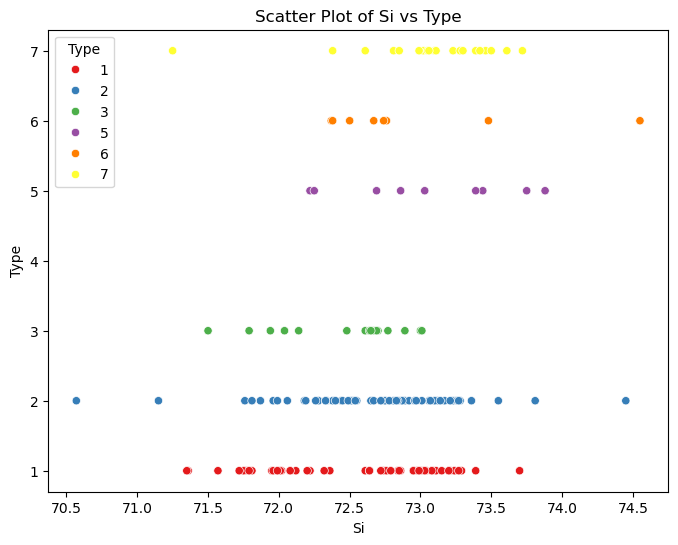

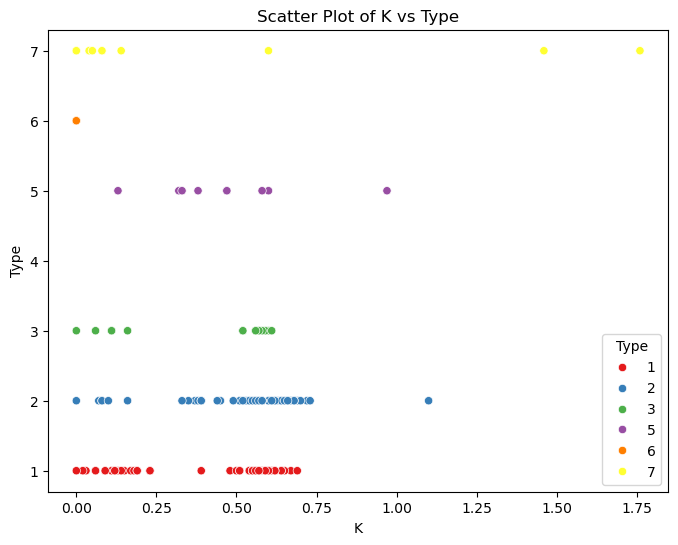

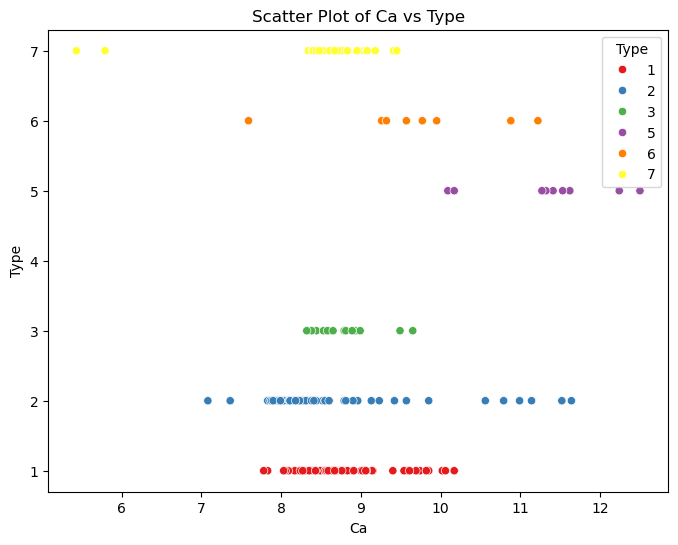

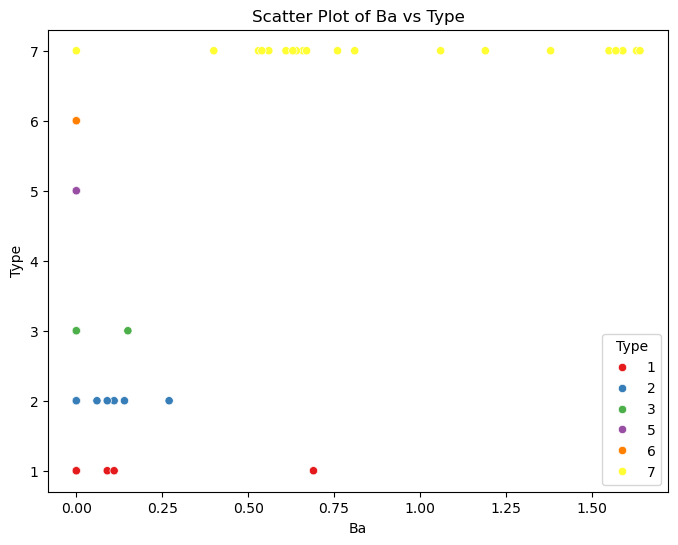

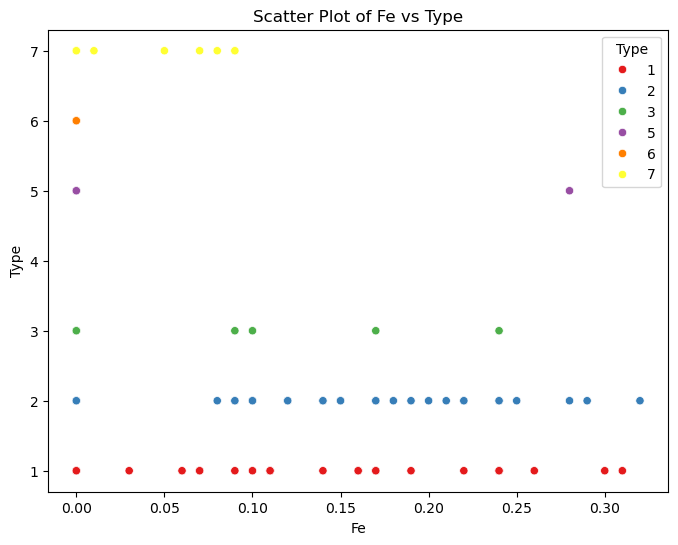

In [5]:
for column in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y="Type", hue="Type", palette="Set1", legend=True)
    plt.title(f'Scatter Plot of {column} vs Type')
    plt.xlabel(column)
    plt.ylabel("Type")
    plt.show()

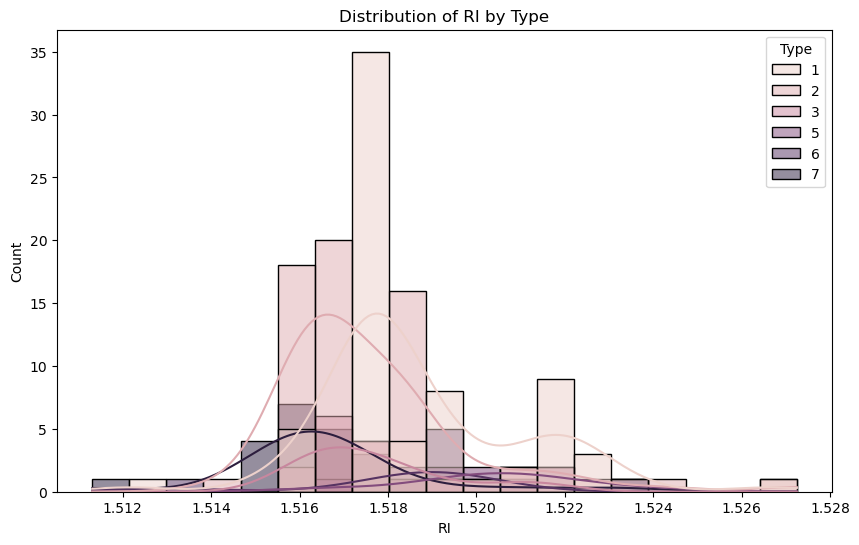

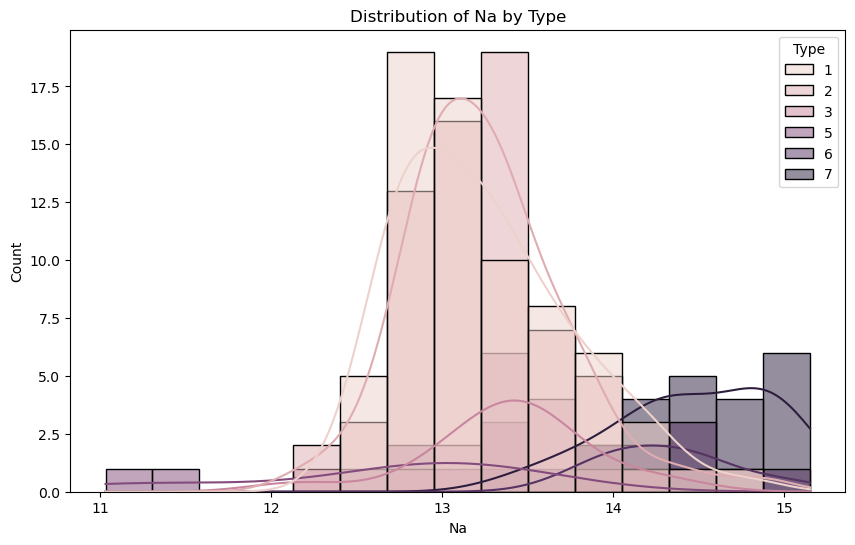

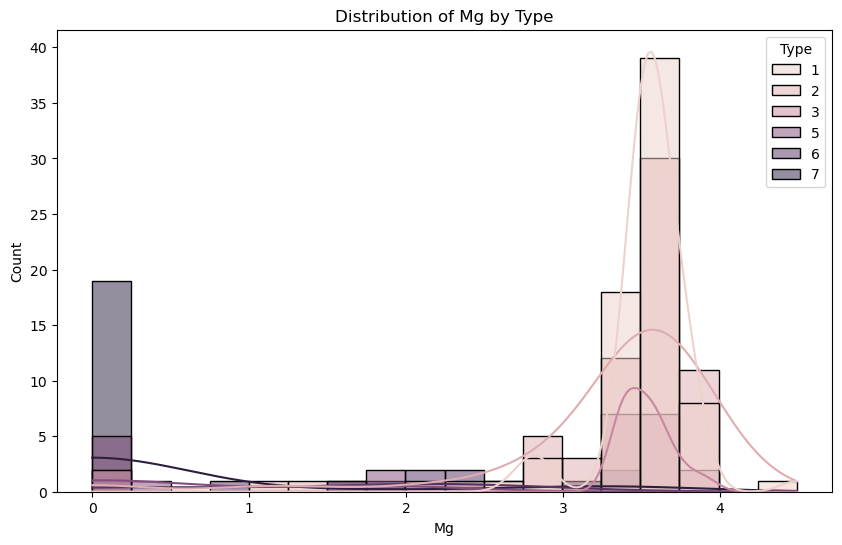

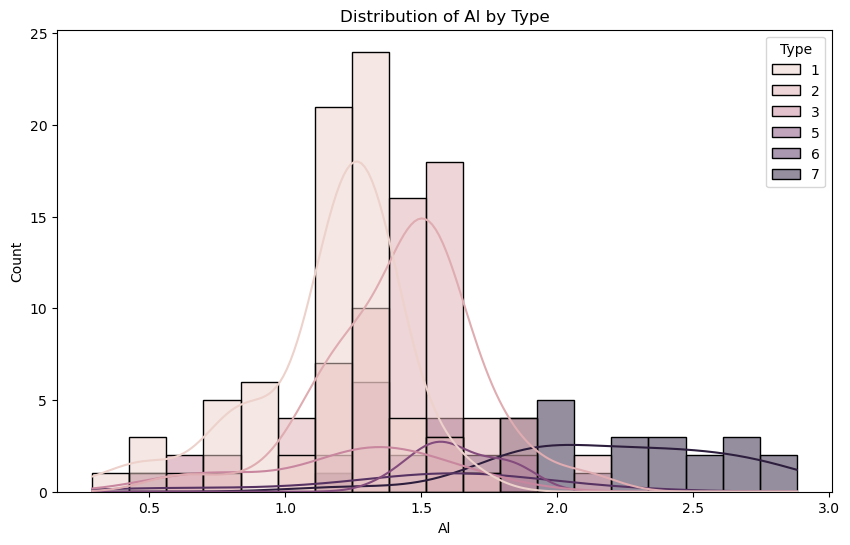

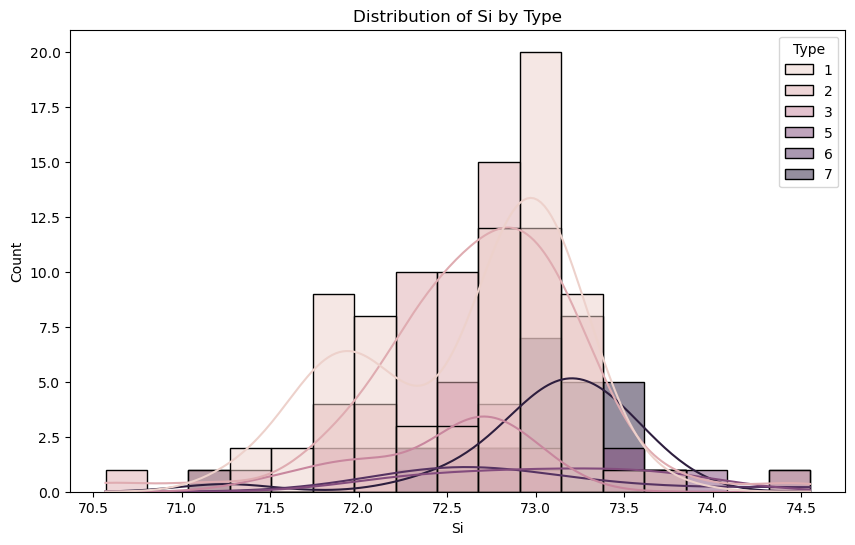

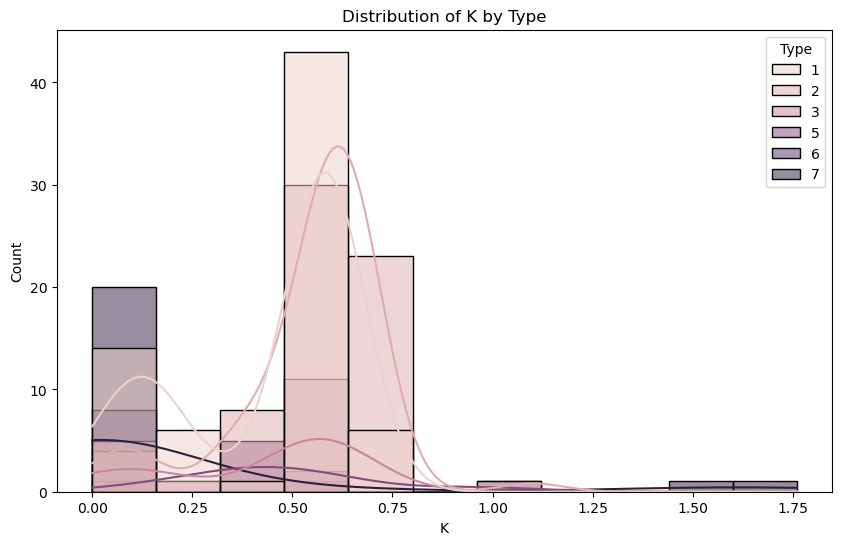

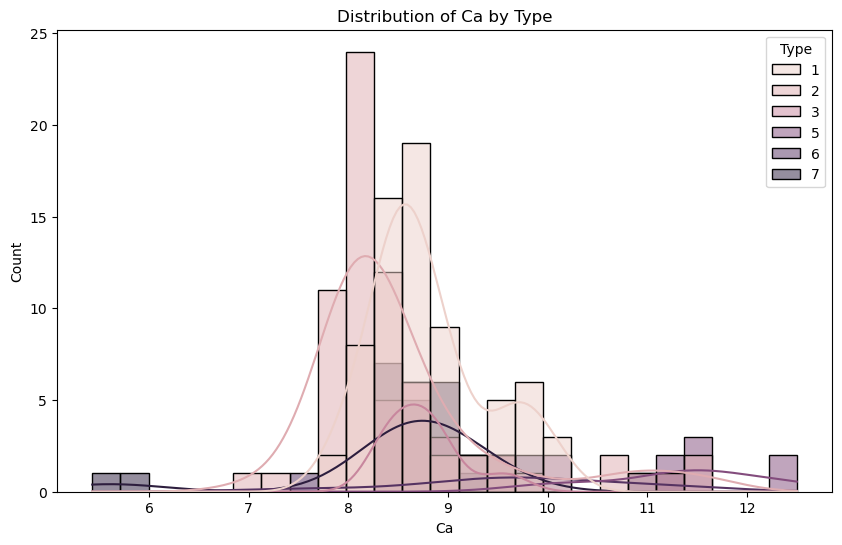

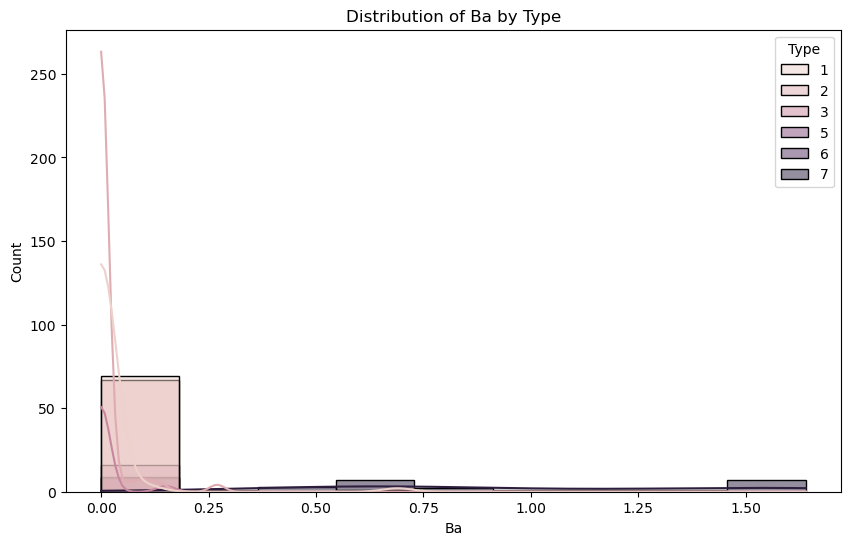

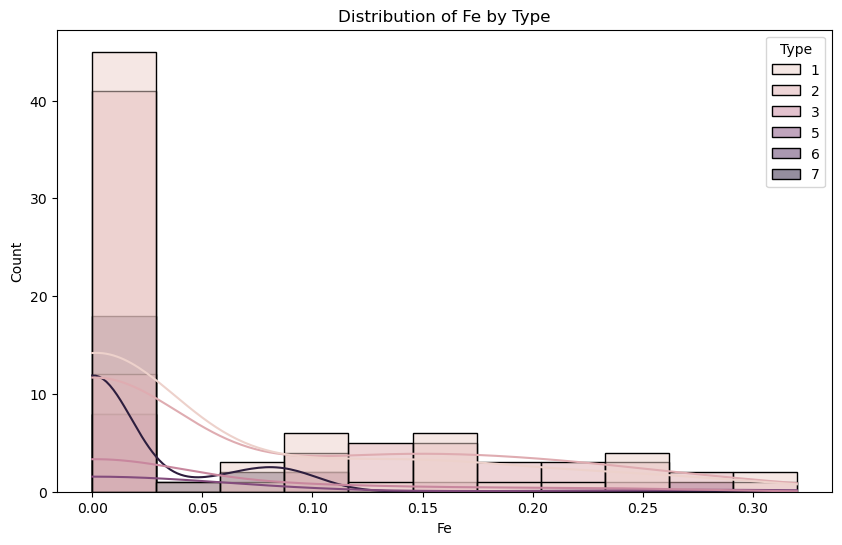

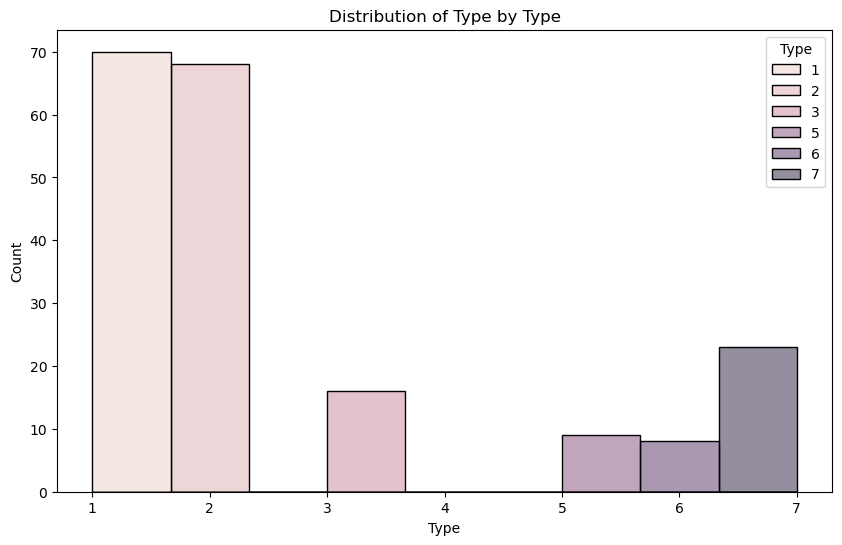

In [6]:
for feature in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='Type', kde=True)
    plt.title(f'Distribution of {feature} by Type')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [7]:
# Data Pre-processing

# Shuffle the dataset
data = shuffle(data, random_state=42)

# Separate features (X) and target variable (y)
X = data.drop('Type', axis=1)
y = data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:2])
print(y_train.head(3))

[[ 0.51389402  0.34745822  0.51240468 -1.46369704 -0.10660551 -0.91735066
   0.02155583  0.07173304  2.10148143]
 [-0.923646    2.15761902 -2.23058504  2.14026999  0.94704107 -1.485398
  -0.10927249  1.46156068  0.39011739]]
161    3
191    7
86     2
Name: Type, dtype: int64


In [8]:
# Define parameters to iterate over
ks = [3, 5, 7] 
weights = ['uniform', 'distance']
metrics = ['minkowski', 'euclidean', 'manhattan']

best_params = None
best_accuracy = 0

# Iterate through different combinations of parameters
for k in ks:
    for weight in weights:
        for metric in metrics:
            # Initialize KNN classifier with current parameters
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
            
            # Perform cross-validation to assess performance
            cv_scores = cross_val_score(knn, X, y, cv=5)
            avg_cv_score = np.mean(cv_scores)
            
            # Fit the model on the entire dataset and calculate accuracy
            knn.fit(X, y)
            y_pred = knn.predict(X)
            acc = accuracy_score(y, y_pred)
            
            # Check if the current model has higher accuracy than the previous best model
            if acc > best_accuracy:
                best_accuracy = acc
                best_params = {'k': k, 'weight': weight, 'metric': metric}
                
            # Print the results
            print("Parameters: k={}, weight={}, metric={}".format(k, weight, metric))
            print("Average Cross-Validation Score:", avg_cv_score)
            print("Accuracy (on entire dataset):", acc)
            print()

Parameters: k=3, weight=uniform, metric=minkowski
Average Cross-Validation Score: 0.670310391363023
Accuracy (on entire dataset): 0.845360824742268

Parameters: k=3, weight=uniform, metric=euclidean
Average Cross-Validation Score: 0.670310391363023
Accuracy (on entire dataset): 0.845360824742268

Parameters: k=3, weight=uniform, metric=manhattan
Average Cross-Validation Score: 0.7064777327935222
Accuracy (on entire dataset): 0.865979381443299

Parameters: k=3, weight=distance, metric=minkowski
Average Cross-Validation Score: 0.6960863697705804
Accuracy (on entire dataset): 1.0

Parameters: k=3, weight=distance, metric=euclidean
Average Cross-Validation Score: 0.6960863697705804
Accuracy (on entire dataset): 1.0

Parameters: k=3, weight=distance, metric=manhattan
Average Cross-Validation Score: 0.7063427800269906
Accuracy (on entire dataset): 1.0

Parameters: k=5, weight=uniform, metric=minkowski
Average Cross-Validation Score: 0.6445344129554655
Accuracy (on entire dataset): 0.77835051

In [9]:
print("Best parameters : ", best_params)
print("Best Accuracy : ", best_accuracy)

Best parameters :  {'k': 3, 'weight': 'distance', 'metric': 'minkowski'}
Best Accuracy :  1.0


In [10]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski')

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying the results
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.7948717948717948

Confusion Matrix:
[[11  0  0  0  0  0]
 [ 4 14  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  0  0  4]]

Classification Report:
              precision    recall  f1-score   support

           1       0.61      1.00      0.76        11
           2       0.93      0.78      0.85        18
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.79        39
   macro avg       0.59      0.63      0.60        39
weighted avg       0.76      0.79      0.76        39



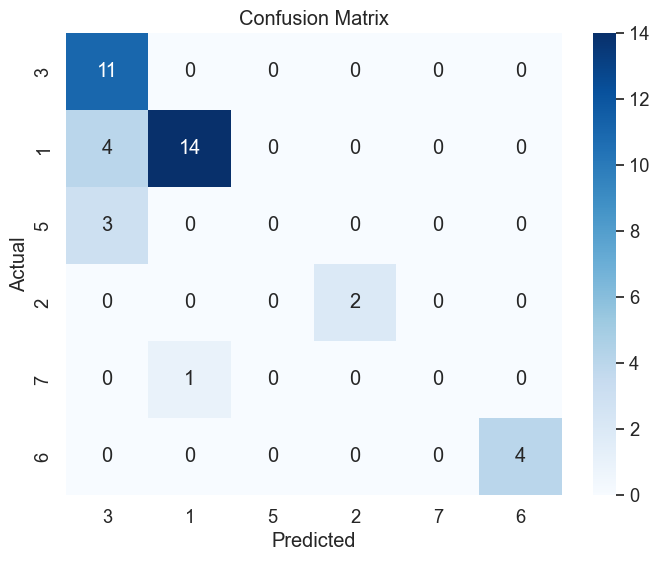

In [11]:
# Confusion Matrix Visualization
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['Type'].unique(), yticklabels=data['Type'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

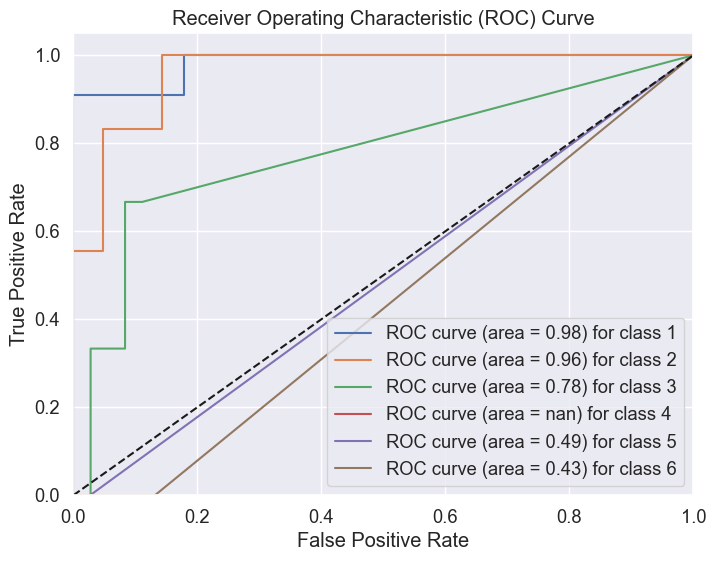

In [12]:
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(data['Type'].unique())):
    fpr[i], tpr[i], _ = roc_curve(y_test, knn_classifier.predict_proba(X_test_scaled)[:, i], pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(data['Type'].unique())):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i+1))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

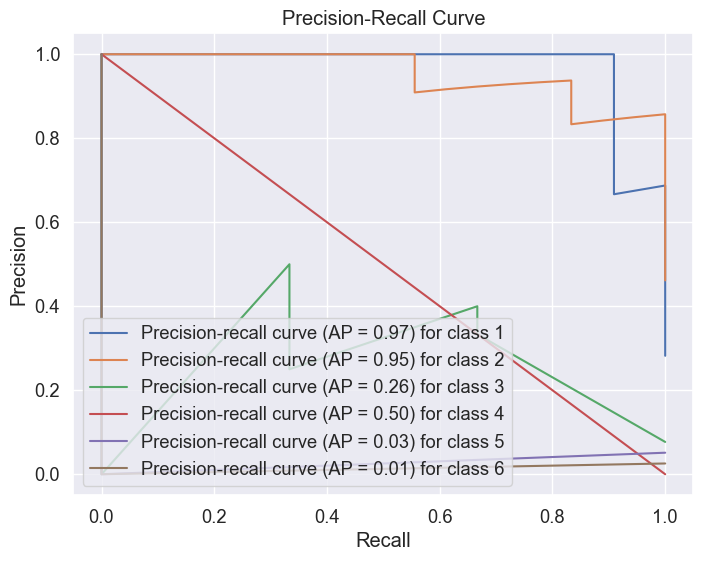

In [13]:
# Compute precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(data['Type'].unique())):
    precision[i], recall[i], _ = precision_recall_curve(y_test, knn_classifier.predict_proba(X_test_scaled)[:, i], pos_label=i+1)
    average_precision[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(data['Type'].unique())):
    plt.plot(recall[i], precision[i], label='Precision-recall curve (AP = %0.2f) for class %d' % (average_precision[i], i+1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()